# Colour Classification using Empirical Testing Mechanisms

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Colour-Classification-using-Empirical-Testing-Mechanisms" data-toc-modified-id="Colour-Classification-using-Empirical-Testing-Mechanisms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Colour Classification using Empirical Testing Mechanisms</a></span><ul class="toc-item"><li><span><a href="#Set-Up-and-Imports" data-toc-modified-id="Set-Up-and-Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set-Up and Imports</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Imshow-Function" data-toc-modified-id="Imshow-Function-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Imshow Function</a></span></li><li><span><a href="#Checking-For-Grey" data-toc-modified-id="Checking-For-Grey-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Checking For Grey</a></span></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Read-the-Image-in-RGBA-Form" data-toc-modified-id="Read-the-Image-in-RGBA-Form-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Read the Image in RGBA Form</a></span></li><li><span><a href="#Convert-BGR-Image-Black-to-White" data-toc-modified-id="Convert-BGR-Image-Black-to-White-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Convert BGR Image Black to White</a></span></li><li><span><a href="#Convert-Gray-in-the-Image" data-toc-modified-id="Convert-Gray-in-the-Image-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Convert Gray in the Image</a></span></li><li><span><a href="#Centralise-Green-Colour-Hue" data-toc-modified-id="Centralise-Green-Colour-Hue-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Centralise Green Colour Hue</a></span></li><li><span><a href="#Convert-the-rest-to-Red" data-toc-modified-id="Convert-the-rest-to-Red-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Convert the rest to Red</a></span></li><li><span><a href="#Utilise-MIT-Sceneparsing" data-toc-modified-id="Utilise-MIT-Sceneparsing-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Utilise MIT Sceneparsing</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Comparison</a></span></li><li><span><a href="#Golfed-Approach" data-toc-modified-id="Golfed-Approach-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>Golfed Approach</a></span></li></ul></li><li><span><a href="#Test-an-Existing-Image" data-toc-modified-id="Test-an-Existing-Image-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Test an Existing Image</a></span><ul class="toc-item"><li><span><a href="#Convert" data-toc-modified-id="Convert-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Convert</a></span></li><li><span><a href="#Show-Converted-Image" data-toc-modified-id="Show-Converted-Image-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Show Converted Image</a></span></li></ul></li></ul></li></ul></div>

## Set-Up and Imports

### Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Imshow Function

In [2]:
def imshow(img, cmap=None):
    plt.figure(figsize=(20, 20))
    plt.imshow(img, cmap=cmap)
    plt.show()

### Checking For Grey

In [3]:
def check_grey(bgr_values):
    return ((np.abs(int(bgr_values[0]) - int(bgr_values[1])) + np.abs(int(bgr_values[1]) - int(bgr_values[2])) + np.abs(int(bgr_values[0]) - int(bgr_values[2]))) < 20) and ~np.all(bgr_values==255)

## Classification

### Read the Image in RGBA Form

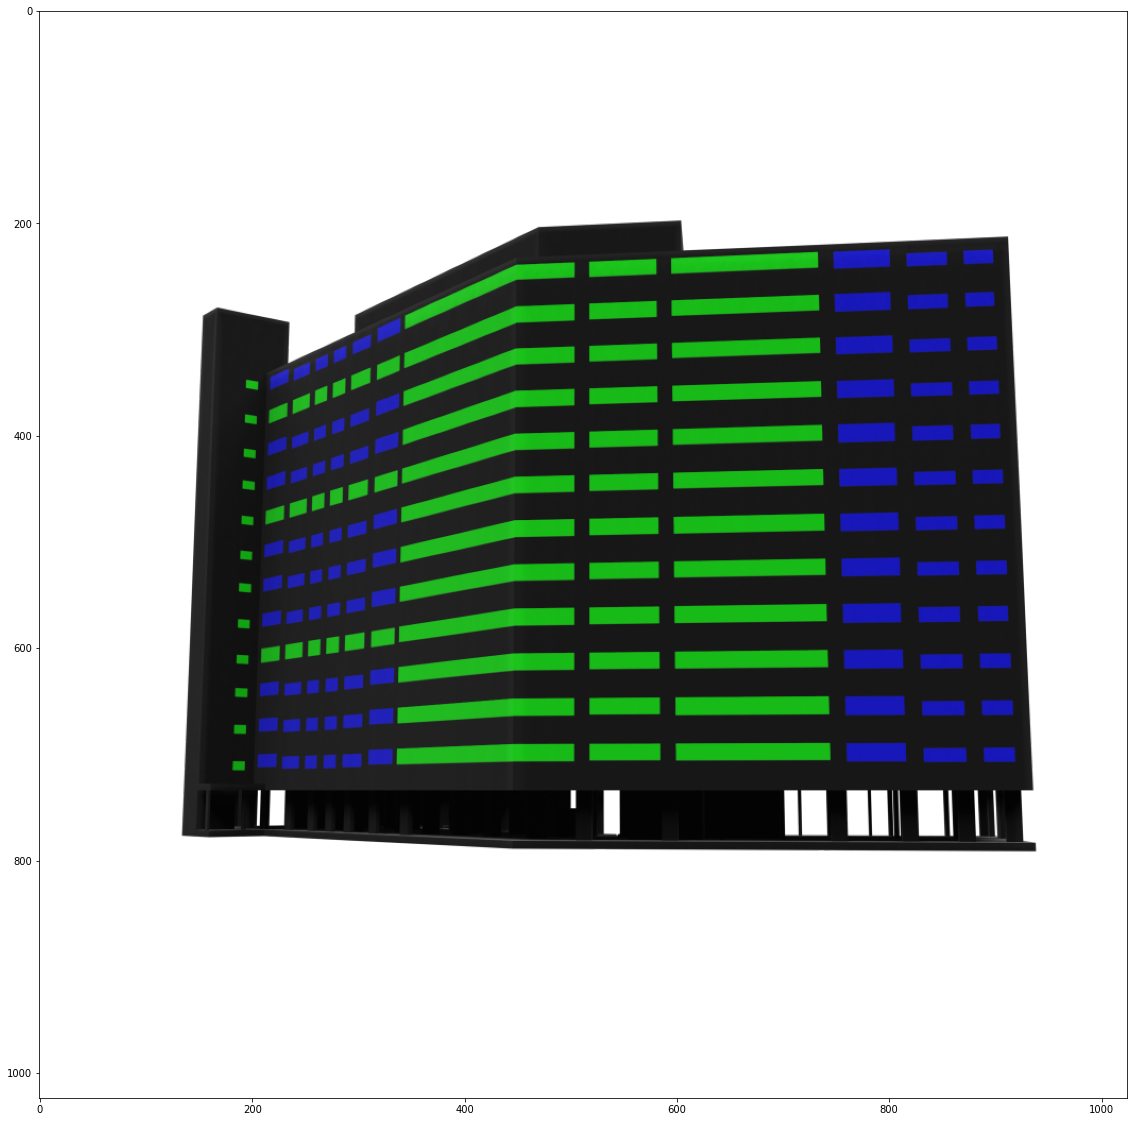

In [4]:
img = cv2.imread("image_1.png", cv2.IMREAD_UNCHANGED)
imshow(img)

In [5]:
h,w,_ =img.shape
h,w

(1024, 1024)

### Convert BGR Image Black to White

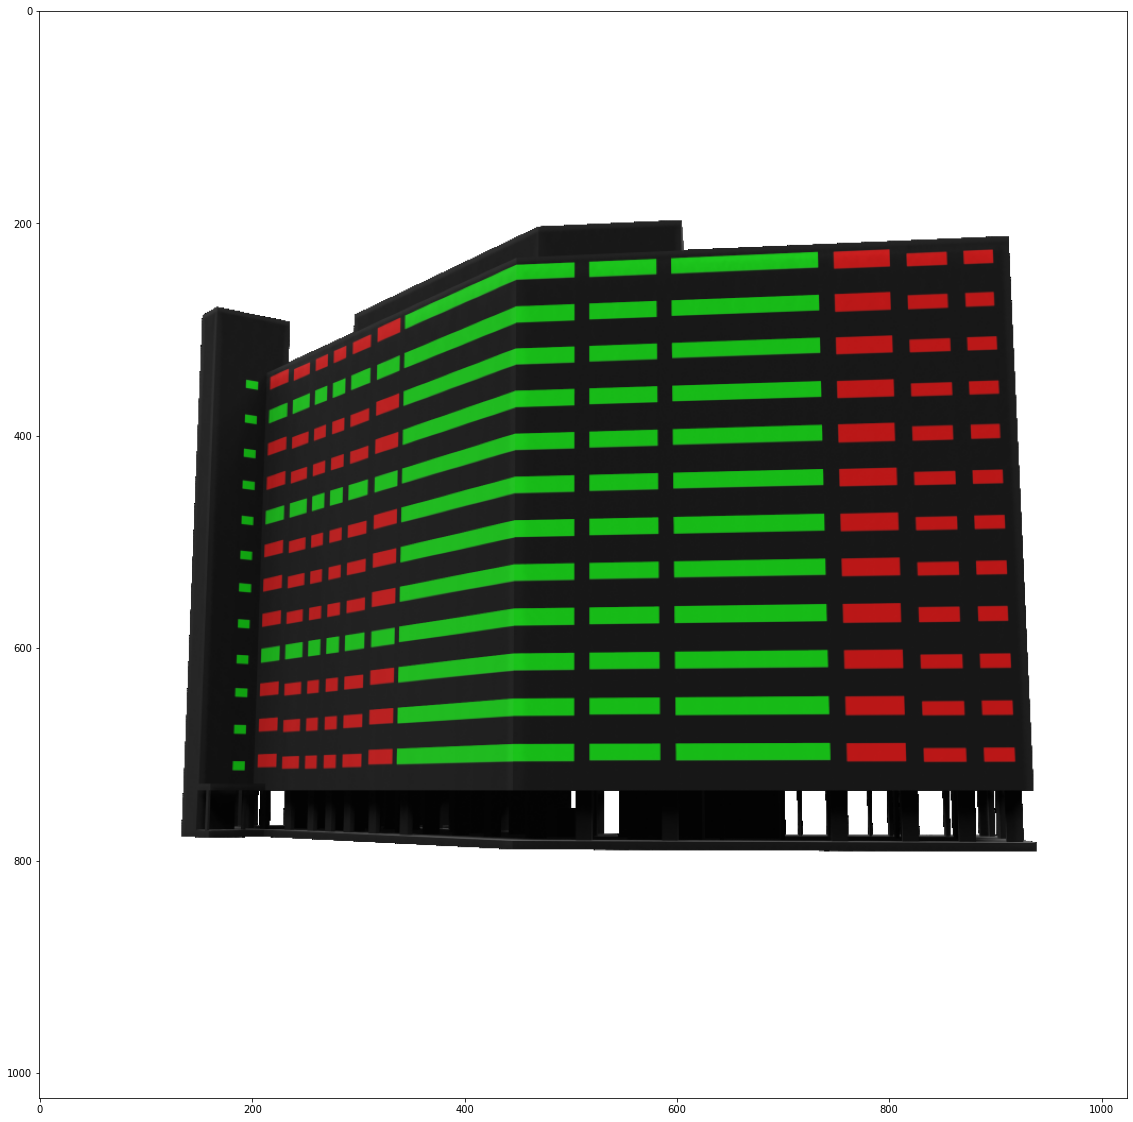

In [6]:
bgr = cv2.cvtColor(np.uint8(np.where(np.dstack(4*[np.all(img==0,axis=-1)]),np.full((h,w,4),255),img)),cv2.COLOR_RGBA2BGR)
imshow(bgr)

### Convert Gray in the Image

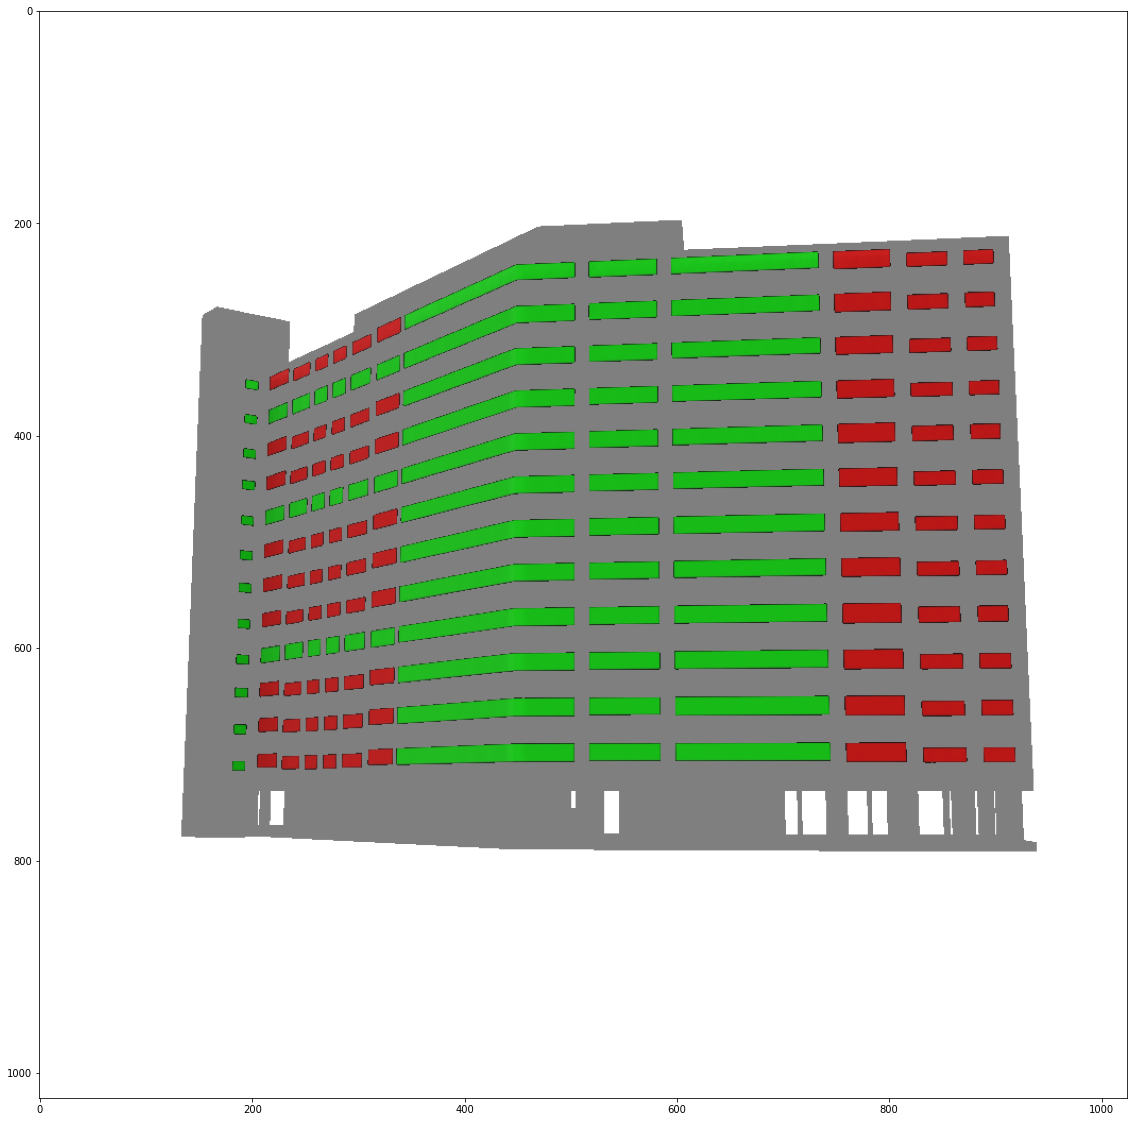

In [7]:
bgr = np.array([[[127,127,127] if ((np.abs(int(bgr[i,j,0]) - int(bgr[i,j,1])) + np.abs(int(bgr[i,j,1]) - int(bgr[i,j,2])) + np.abs(int(bgr[i,j,0]) - int(bgr[i,j,2]))) < 20) and ~np.all(bgr[i,j]==255) else bgr[i,j] for j in range(w)] for i in range(h)],dtype=np.uint8) 
imshow(bgr)

### Centralise Green Colour Hue

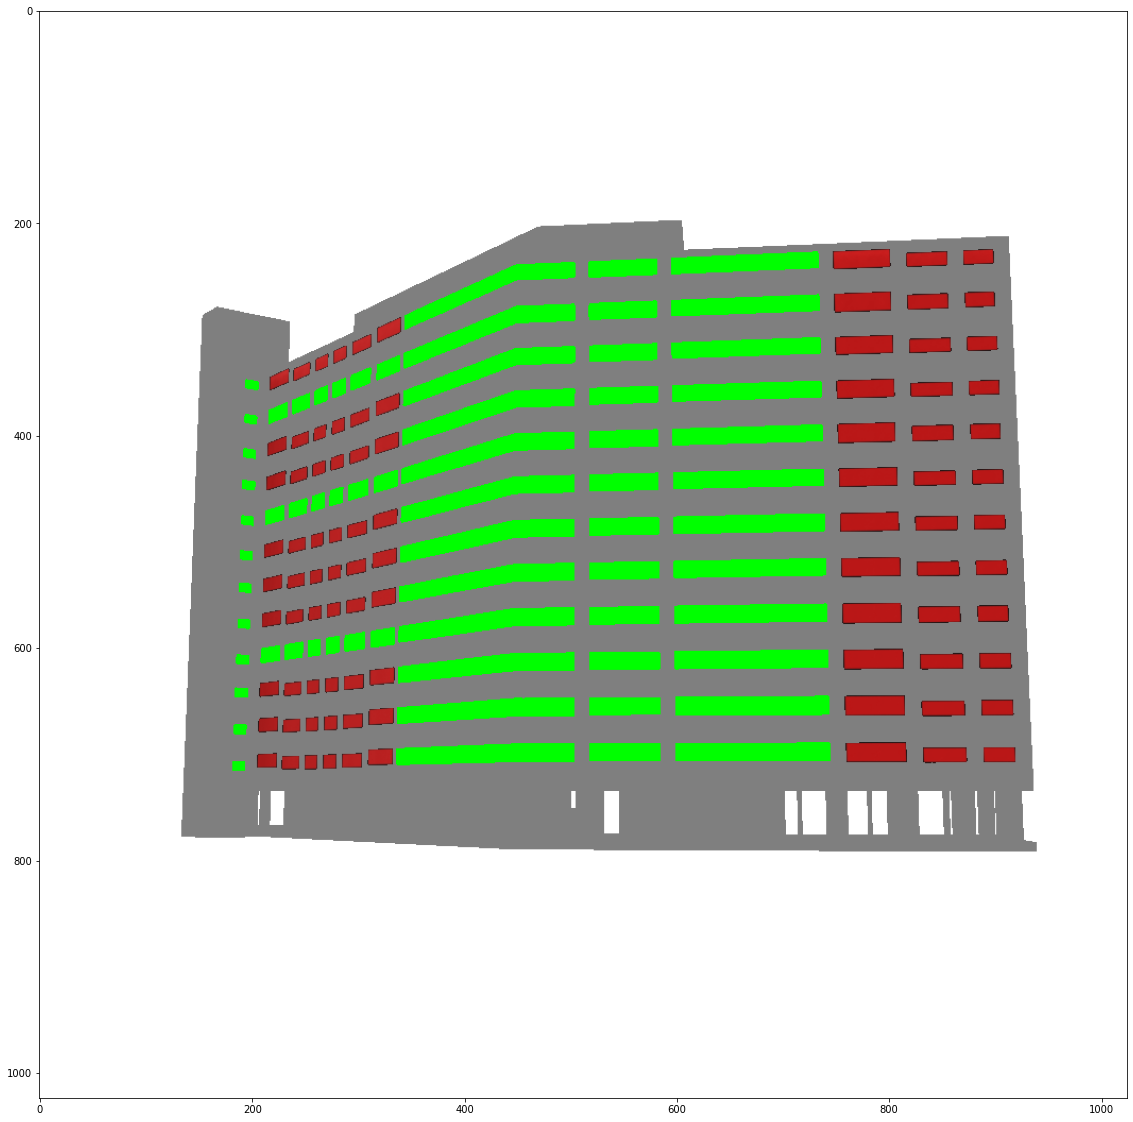

In [8]:
bgr = (lambda hsv:cv2.cvtColor(np.where(np.dstack(3*[(hsv[:,:,0]<70) & (hsv[:,:,0]>40)]), np.full((h,w,3), [60,255,255],dtype=np.uint8), hsv), cv2.COLOR_HSV2BGR))(cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV))
imshow(bgr)

### Convert the rest to Red

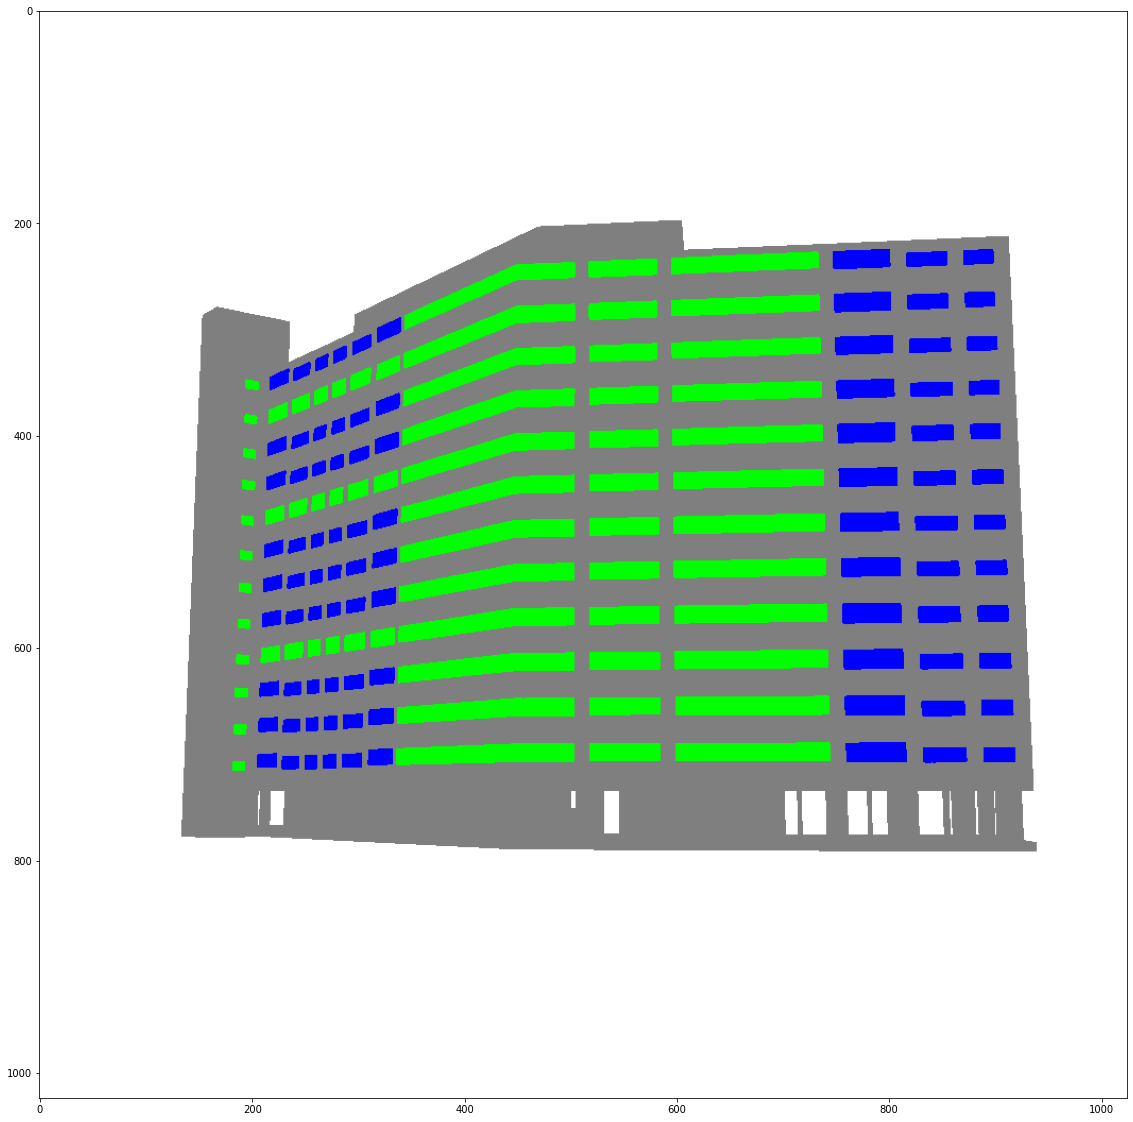

In [9]:
bgr = np.where(np.dstack(3*[np.any((bgr!=[0,255,0])&(bgr!=127)&(bgr!=255),axis=-1)]),np.full((h,w,3),[0,0,255],dtype=np.uint8),bgr)
imshow(bgr)

### Utilise MIT Sceneparsing

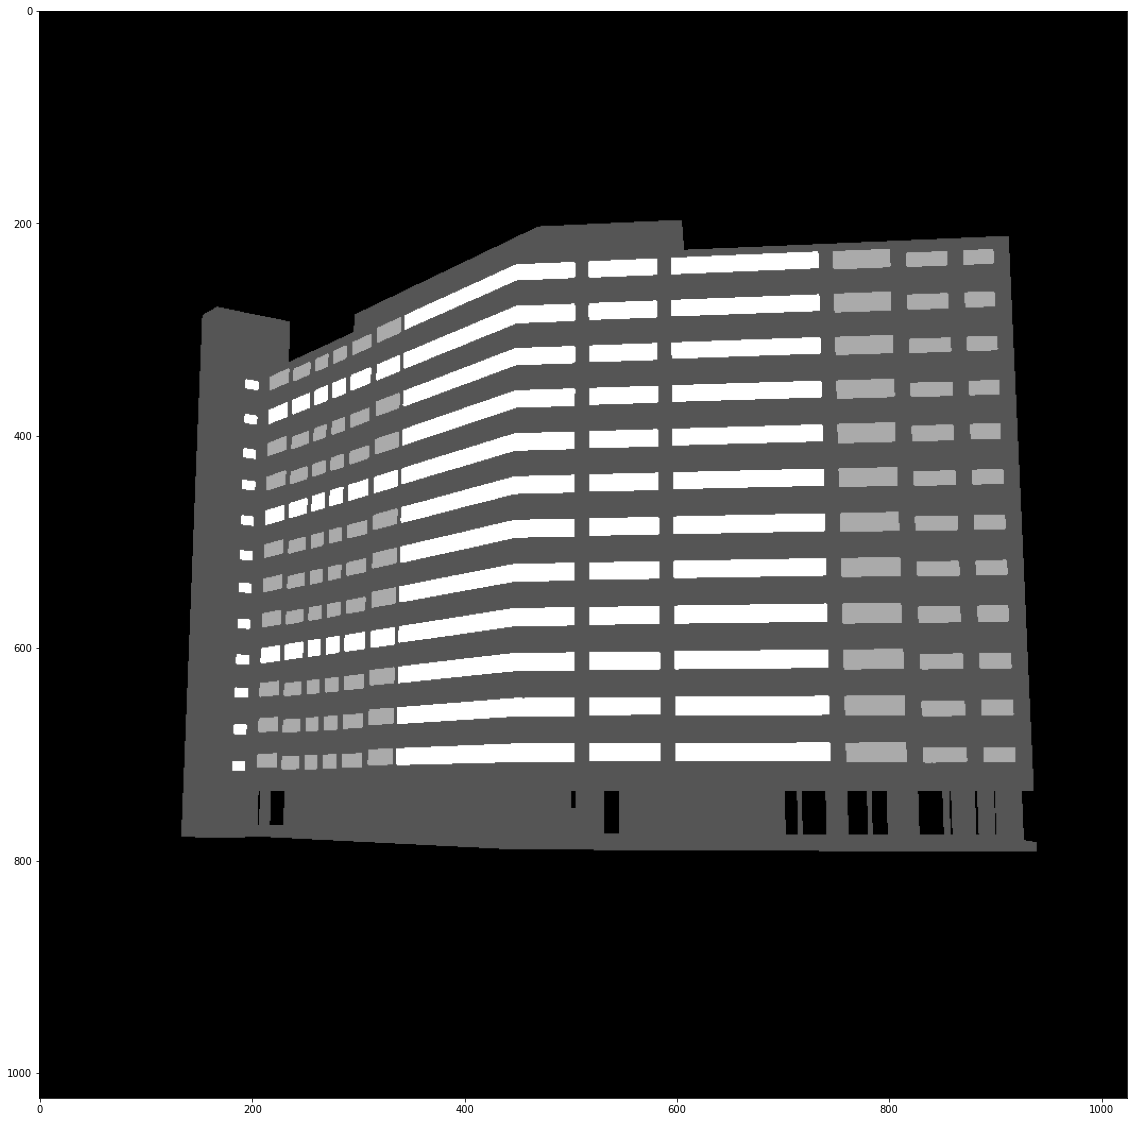

In [10]:
gray = np.where(np.all(bgr==[0,255,0],axis=-1),np.full((h,w),3),np.where(np.all(bgr==[0,0,255],axis=-1),np.full((h,w),2),np.where(np.all(bgr==127,axis=-1),np.full((h,w),1), np.zeros((h,w)))))
imshow(gray,cmap=plt.cm.gray)

### Comparison

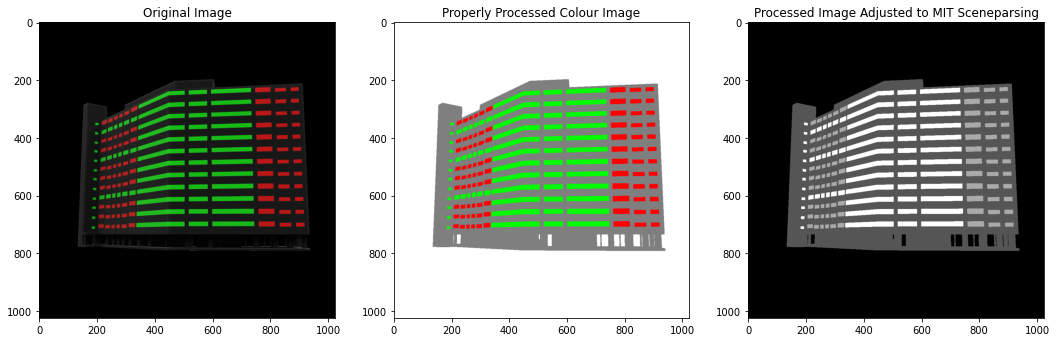

In [11]:
fig, axes = plt.subplots(1,3, figsize=(18,6))
husk = cv2.cvtColor(img,cv2.COLOR_RGBA2BGR)
axes[0].imshow(husk)
axes[0].set_title("Original Image")
axes[1].imshow(bgr[:,:,::-1])
axes[1].set_title("Properly Processed Colour Image")
axes[2].imshow(gray, cmap=plt.cm.gray)
axes[2].set_title("Processed Image Adjusted to MIT Sceneparsing")
plt.savefig('exterior-comparison.png')

### Golfed Approach

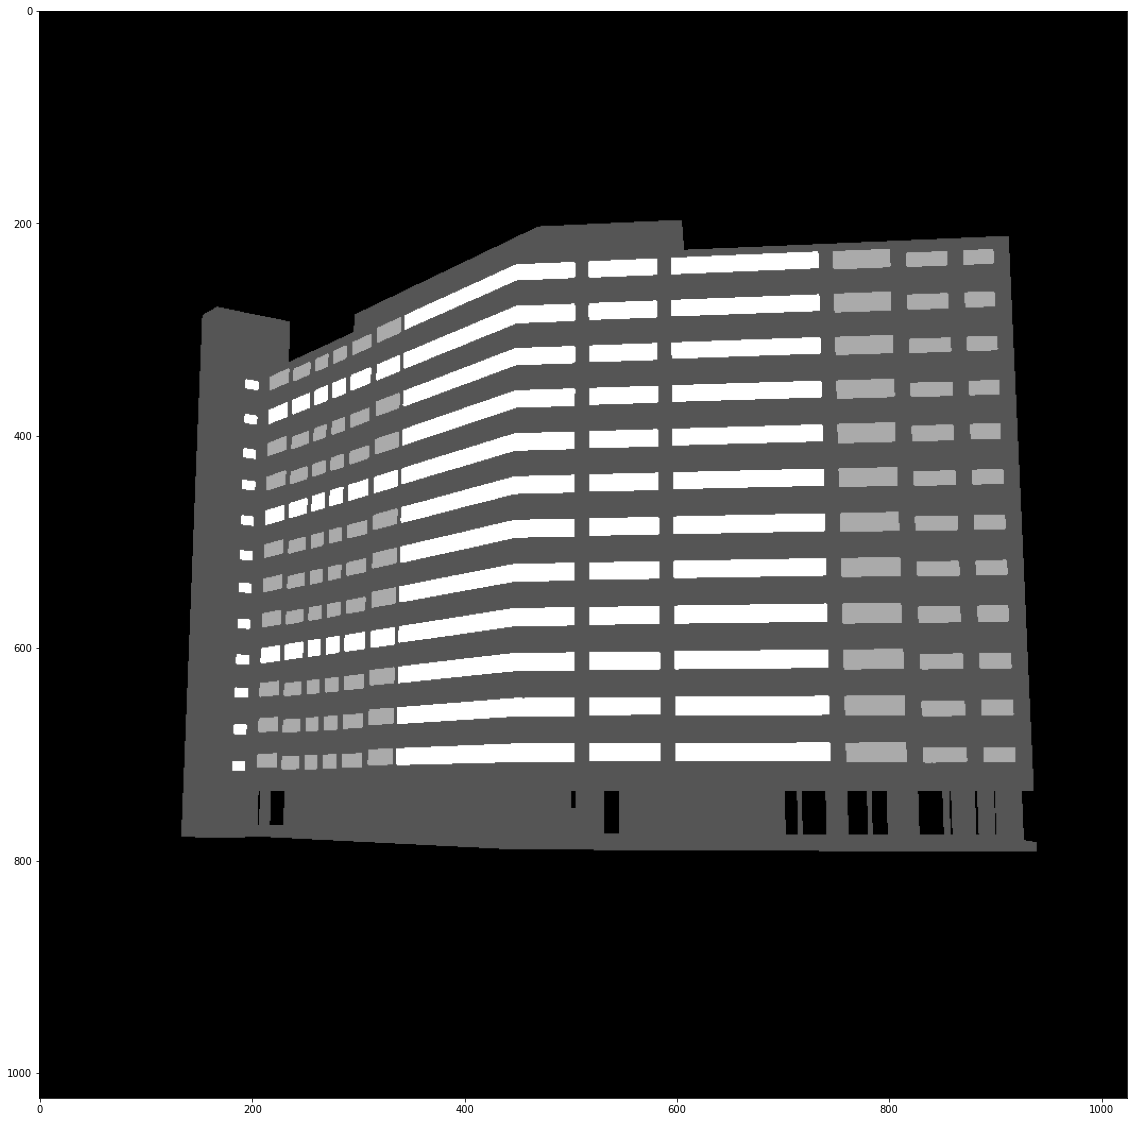

In [12]:
imshow((lambda img,h,w:((lambda bgr: np.where(np.all(bgr==[0,255,0],axis=-1),np.full((h,w),3),np.where(np.all(bgr==[0,0,255],axis=-1),np.full((h,w),2),np.where(np.all(bgr==127,axis=-1),np.full((h,w),1),np.zeros((h,w))))))((lambda bgr:np.where(np.dstack(3*[np.any((bgr!=[0,255,0])&(bgr!=127)&(bgr!=255),axis=-1)]),np.full((h,w,3),[0,0,255],dtype=np.uint8),bgr))(((lambda hsv:cv2.cvtColor(np.where(np.dstack(3*[(hsv[:,:,0]<70)&(hsv[:,:,0]>40)]),np.full((h,w,3),[60,255,255],dtype=np.uint8),hsv),cv2.COLOR_HSV2BGR))(cv2.cvtColor((lambda bgr:np.array([[[127,127,127] if ((np.abs(int(bgr[i,j,0]) - int(bgr[i,j,1])) + np.abs(int(bgr[i,j,1]) - int(bgr[i,j,2])) + np.abs(int(bgr[i,j,0]) - int(bgr[i,j,2]))) < 20) and ~np.all(bgr[i,j]==255) else bgr[i,j] for j in range(w)] for i in range(h)],dtype=np.uint8))(cv2.cvtColor(np.uint8(np.where(np.dstack(4*[np.all(img==0,axis=-1)]),np.full((h,w,4),255),img)),cv2.COLOR_RGBA2BGR)),cv2.COLOR_BGR2HSV)))))))(*((lambda img:([img]+list(img.shape[:2])))(img)))+1, cmap=plt.cm.gray)

## Test an Existing Image

### Convert

In [19]:
convert = lambda path:cv2.imwrite(path.replace("annotated","annotations"),(lambda img,h,w:((lambda bgr: np.where(np.all(bgr==[0,255,0],axis=-1),np.full((h,w),3),np.where(np.all(bgr==[0,0,255],axis=-1),np.full((h,w),2),np.where(np.all(bgr==127,axis=-1),np.full((h,w),1),np.zeros((h,w))))))((lambda bgr:np.where(np.dstack(3*[np.any((bgr!=[0,255,0])&(bgr!=127)&(bgr!=255),axis=-1)]),np.full((h,w,3),[0,0,255],dtype=np.uint8),bgr))(((lambda hsv:cv2.cvtColor(np.where(np.dstack(3*[(hsv[:,:,0]<70)&(hsv[:,:,0]>40)]),np.full((h,w,3),[60,255,255],dtype=np.uint8),hsv),cv2.COLOR_HSV2BGR))(cv2.cvtColor((lambda bgr:np.array([[[127,127,127] if ((np.abs(int(bgr[i,j,0]) - int(bgr[i,j,1])) + np.abs(int(bgr[i,j,1]) - int(bgr[i,j,2])) + np.abs(int(bgr[i,j,0]) - int(bgr[i,j,2]))) < 20) and ~np.all(bgr[i,j]==255) else bgr[i,j] for j in range(w)] for i in range(h)],dtype=np.uint8))(cv2.cvtColor(np.uint8(np.where(np.dstack(4*[np.all(img==0,axis=-1)]),np.full((h,w,4),255),img)),cv2.COLOR_RGBA2BGR)),cv2.COLOR_BGR2HSV)))))))(*((lambda img:([img]+list(img.shape[:2])))(cv2.imread(path, cv2.IMREAD_UNCHANGED))))+1)
convert("./annotated/990_1.3360204+103.7201214_temp_99_59_63_48_63_35_21_54_3_27_20_76.png")

True

### Show Converted Image

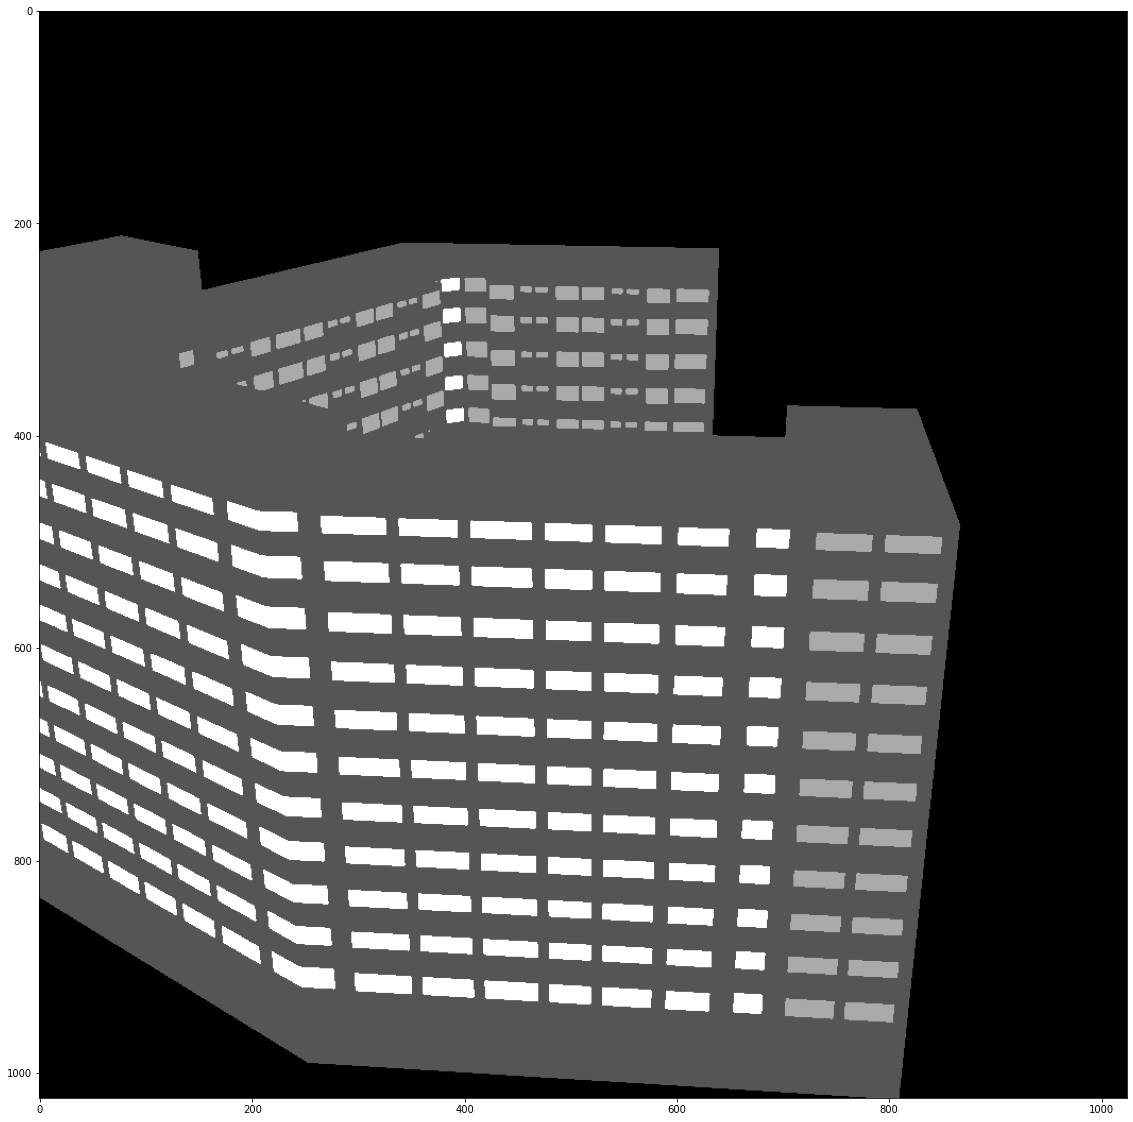

In [24]:
imshow(cv2.imread("./annotations/990_1.3360204+103.7201214_temp_99_59_63_48_63_35_21_54_3_27_20_76.png", cv2.IMREAD_GRAYSCALE), cmap=plt.cm.gray)

In [26]:
img = cv2.imread("./annotations/990_1.3360204+103.7201214_temp_99_59_63_48_63_35_21_54_3_27_20_76.png", cv2.IMREAD_GRAYSCALE)

np.unique(img)

array([1, 2, 3, 4], dtype=uint8)